In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("datasets/wine-labeled.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
# Part (A)
# drop the quality column

data.drop(columns="quality",inplace=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,white


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   object 
dtypes: float64(11), object(1)
memory usage: 609.2+ KB


In [5]:
# Convert the Red/White column to a an array of 1’s and 0’s.

data['type'].replace('red', 1, inplace=True)
data['type'].replace('white', 0, inplace=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
3428,7.7,0.44,0.24,11.20,0.031,41.0,167.0,0.99480,3.12,0.43,11.3,0
4697,5.1,0.33,0.27,6.70,0.022,44.0,129.0,0.99221,3.36,0.39,11.0,0
2540,6.3,0.27,0.46,11.75,0.037,61.0,212.0,0.99710,3.25,0.53,9.5,0
191,6.4,0.37,0.25,1.90,0.074,21.0,49.0,0.99740,3.57,0.62,9.8,1
6379,5.8,0.30,0.09,6.30,0.042,36.0,138.0,0.99382,3.15,0.48,9.7,0


In [6]:
# Part (B) 
#  Calculate the top 5 principal components and find the explained variance ratio.

x_data = data.iloc[:,:11]
x_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [7]:
y_data = data["type"]
y_data

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

In [8]:
from sklearn.decomposition import PCA

pca5 = PCA(n_components=5)
pca5.fit(x_data)

# show 5 pca
pca5_transformed = pca5.transform(x_data)
pd.DataFrame(data=pca5_transformed)

,0,1,2,3,4
0,-84.111149,-0.145117,0.025666,0.399654,-1.581266
1,-48.779427,5.847319,-0.862358,0.775057,-0.780022
2,-63.734575,-0.876416,-0.423401,0.649272,-0.880127
3,-57.481266,-0.345098,-1.008598,3.645054,0.892979
4,-84.111149,-0.145117,0.025666,0.399654,-1.581266
...,...,...,...,...,...
6492,-24.741512,-0.916209,-2.879699,-1.154000,-0.281481
6493,57.017361,13.706750,0.011390,0.216101,-0.593701
6494,-4.896142,0.508568,-3.964622,0.178853,-1.575022
6495,-8.188532,-8.973281,-4.061992,-2.494224,0.807627


In [9]:
pca5.components_

array([[-7.40796441e-03, -1.18432899e-03,  4.86869305e-04,
         4.10197175e-02, -1.68198717e-04,  2.30481781e-01,
         9.72166826e-01,  1.77233905e-06, -6.55520548e-04,
        -7.04338632e-04, -5.45173684e-03],
       [-5.36562393e-03, -7.84498565e-04, -2.47947037e-04,
         1.86364316e-02,  6.72674387e-05,  9.72658270e-01,
        -2.31409676e-01,  1.32996637e-06,  6.47986887e-04,
         3.46357533e-04,  2.85017390e-03],
       [ 2.37980377e-02,  8.84101767e-04,  1.92869419e-03,
         9.95274105e-01,  1.73019914e-04, -2.72149098e-02,
        -3.58290013e-02,  4.60408843e-04, -6.91161807e-03,
        -1.93529116e-03, -8.23558184e-02],
       [ 8.57756781e-01,  1.71342614e-02,  3.53280563e-02,
        -6.23231011e-02,  9.19466873e-03,  8.47350928e-03,
         4.31640540e-03,  1.41804609e-03, -3.53876123e-02,
         2.70799224e-02, -5.06621053e-01],
       [ 5.07838342e-01, -1.53591509e-02,  4.34990985e-02,
         5.87771145e-02, -6.57467616e-03,  6.06766412e-04,
  

In [10]:
print("Percentage of variance explained by each of the selected components:\n\n", pca5.explained_variance_ratio_)

# show it is true
print("\nSum:",round(sum(pca5.explained_variance_ratio_),7)*100,"%")

# first two are top 2

Percentage of variance explained by each of the selected components:

 [9.53758252e-01 4.06277547e-02 4.82625097e-03 4.63879237e-04
 3.01694672e-04]

Sum: 99.99778 %


In [11]:
# Part(C) Determine the top 2 principal components as a new array P.

pca2 = PCA(n_components=2)
pca2.fit(x_data)
P = pca2.transform(x_data)
P

array([[-84.11114893,  -0.14511749],
       [-48.779427  ,   5.84731927],
       [-63.73457506,  -0.87641627],
       ...,
       [ -4.89614162,   0.50856799],
       [ -8.18853172,  -8.97328116],
       [-19.4038995 ,  -4.26220226]])

In [12]:
pca2.explained_variance_ratio_ # 95% and 4%

array([0.95375825, 0.04062775])

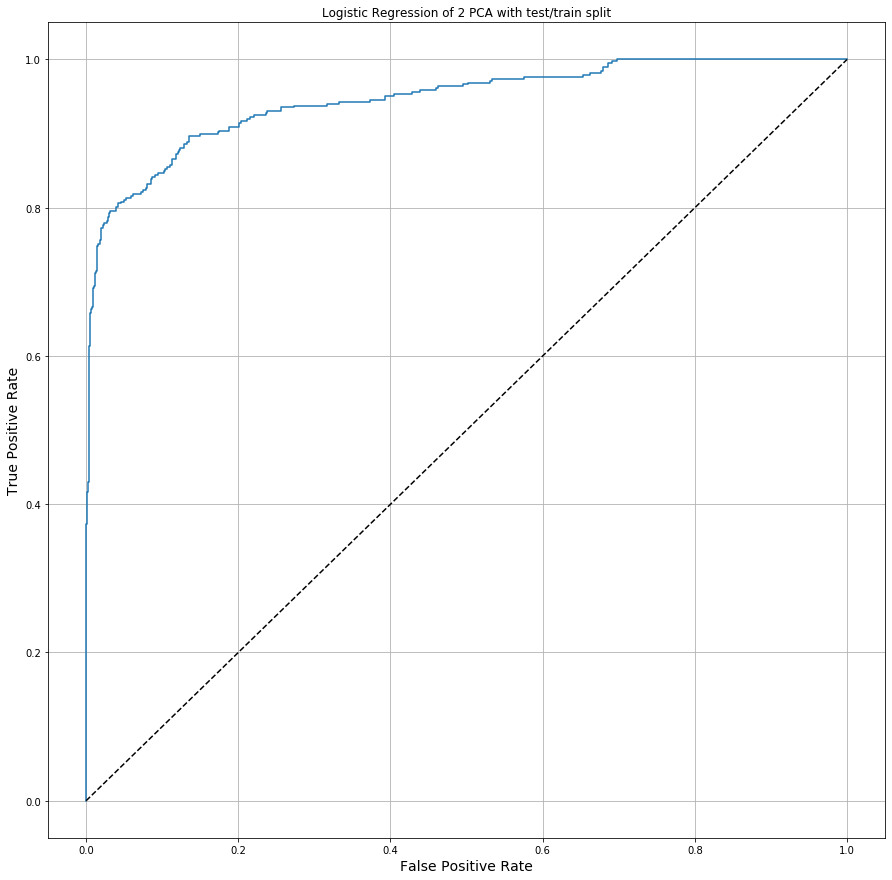

Accuracy: 0.9273846153846154


In [15]:
# Part (D) Perform classification using your favorite method (KNN, logistic, etc.) on P.
# Part E follows by

from sklearn.model_selection import train_test_split as tts, KFold, cross_val_predict as CVP
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 

x_train, x_test, y_train, y_test = tts(P, y_data)
model.fit(x_train, y_train)
y_scores = model.predict_proba(x_test)[:,1]
accuracy = accuracy_score(y_test, y_scores.round())
FPR, TPR, _ = roc_curve(y_test, y_scores)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],c="k",ls="--")
plt.grid()
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("Logistic Regression of 2 PCA with test/train split")
plt.gcf().set_size_inches(15,15)
plt.show()
    
print("Accuracy:",accuracy)

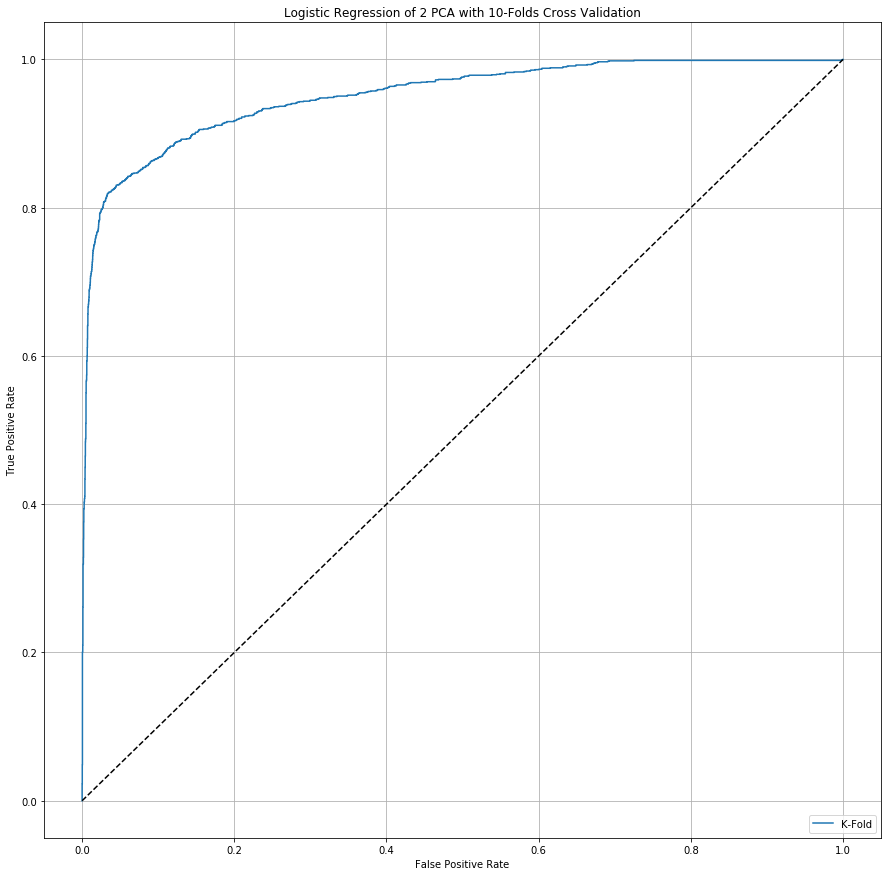

Accuracy: 0.9514415527671312


In [16]:
# another approach to train using cross_val_predict 

y_predict = CVP(LogisticRegression(), P, data['type'], cv=10, method='predict_proba')

FPR, TPR, _ = roc_curve(data['type'], y_predict[:,1])
auc_score   = roc_auc_score(data['type'], y_predict[:,1])

plt.plot(FPR, TPR, label="K-Fold")
plt.plot([0,1],[0,1],c="k",ls="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression of 2 PCA with 10-Folds Cross Validation')
plt.grid()
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 15)
plt.show()
print("Accuracy:",auc_score)

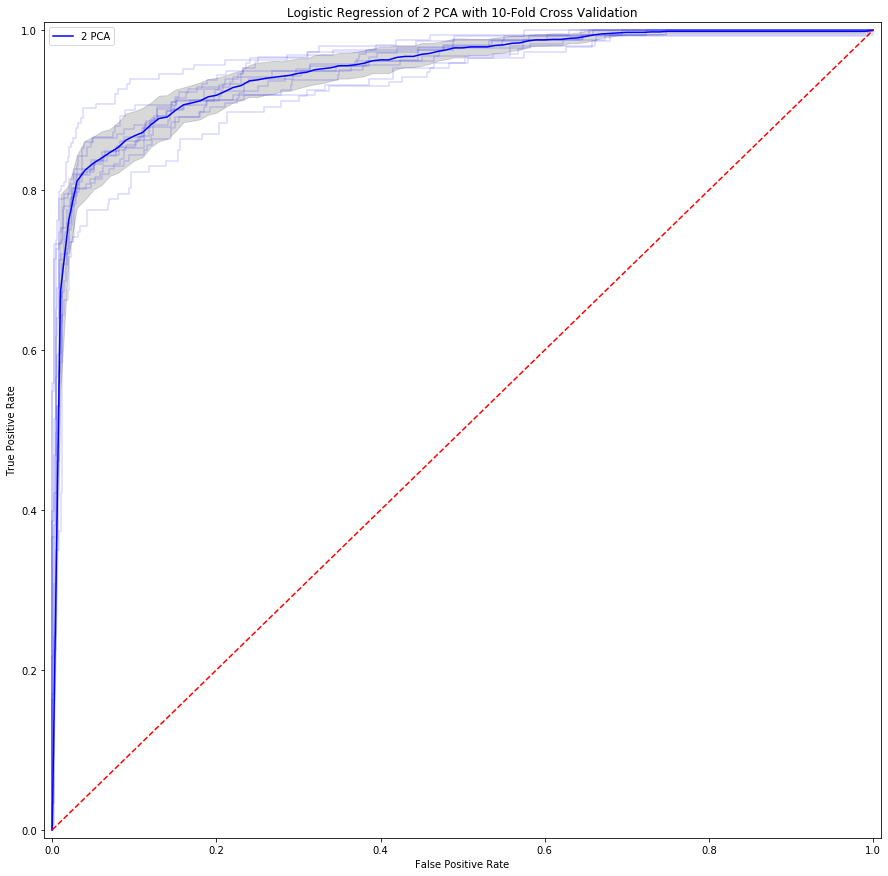

Accuracy: 0.9304323811781439


In [17]:
# add some visual effects to 10-fold

from scipy import interp

tprs = []

plt.figure(figsize=(5, 5))

base_fpr = np.linspace(0, 1, 101)

kf = KFold(n_splits=10, shuffle=True)

accruacy_list = []
for train, test in kf.split(P):
    model = LogisticRegression().fit(P[train], y_data[train])
    y_score = model.predict_proba(P[test])
    fpr, tpr, _ = roc_curve(y_data[test], y_score[:,1])
    accruacy_list.append(accuracy_score(y_data[test], y_score[:,1].round()))
    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std

plt.plot(base_fpr, mean_tprs, 'b',label="2 PCA")

plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title("Logistic Regression of 2 PCA with 10-Fold Cross Validation")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.gcf().set_size_inches(15, 15)
plt.legend()
plt.show()
print("Accuracy:",np.mean(accruacy_list))